# Healthcare Analytics
### The goal of this project is to accurately predict the Length of Stay for each patient so that the hospitals can optimize resources and function better.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification

In [4]:
# Importing datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Exploration

### Overview of Data

In [6]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [7]:
train.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
2021,2022,10,e,1,X,6,gynecology,Q,E,4.0,119526,8.0,Emergency,Moderate,4,31-40,3854,41-50
2022,2023,18,d,13,Y,4,gynecology,R,B,3.0,119526,8.0,Trauma,Moderate,2,31-40,4905,21-30
2023,2024,19,a,7,Y,5,gynecology,Q,C,2.0,119526,8.0,Emergency,Moderate,2,31-40,3218,0-10
2024,2025,32,f,9,Y,4,gynecology,S,B,2.0,119526,8.0,Emergency,Moderate,2,31-40,6797,0-10
2025,2026,12,a,9,Y,4,gynecology,R,B,2.0,119526,8.0,Trauma,Moderate,2,31-40,5162,20-Nov


In [8]:
train.info()
train.Stay.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            2026 non-null   int64  
 1   Hospital_code                      2026 non-null   int64  
 2   Hospital_type_code                 2026 non-null   object 
 3   City_Code_Hospital                 2026 non-null   int64  
 4   Hospital_region_code               2026 non-null   object 
 5   Available Extra Rooms in Hospital  2026 non-null   int64  
 6   Department                         2026 non-null   object 
 7   Ward_Type                          2026 non-null   object 
 8   Ward_Facility_Code                 2026 non-null   object 
 9   Bed Grade                          2024 non-null   float64
 10  patientid                          2026 non-null   int64  
 11  City_Code_Patient                  2013 non-null   float

array(['0-10', '41-50', '31-40', '20-Nov', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [9]:
# NA values in train dataset
train.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    13
Bed Grade                             2
Hospital_code                         0
Admission_Deposit                     0
Age                                   0
Visitors with Patient                 0
Severity of Illness                   0
Type of Admission                     0
patientid                             0
case_id                               0
Ward_Facility_Code                    0
Ward_Type                             0
Department                            0
Available Extra Rooms in Hospital     0
Hospital_region_code                  0
City_Code_Hospital                    0
Hospital_type_code                    0
Stay                                  0
dtype: int64

In [10]:
# NA values in test dataset
test.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    21
Bed Grade                             2
case_id                               0
Age                                   0
Visitors with Patient                 0
Severity of Illness                   0
Type of Admission                     0
patientid                             0
Ward_Facility_Code                    0
Hospital_code                         0
Ward_Type                             0
Department                            0
Available Extra Rooms in Hospital     0
Hospital_region_code                  0
City_Code_Hospital                    0
Hospital_type_code                    0
Admission_Deposit                     0
dtype: int64

In [11]:
# Dimension of train dataset
train.shape

(2026, 18)

In [12]:
# Dimension of test dataset
test.shape

(2017, 17)

In [13]:
# Number of distinct observations in train dataset 
for i in train.columns:
    print(i, ':', train[i].nunique())

case_id : 2026
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 10
Department : 5
Ward_Type : 5
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 384
City_Code_Patient : 23
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 16
Age : 10
Admission_Deposit : 1527
Stay : 11


In [14]:
# Number of distinct observations in test dataset
for i in test.columns:
    print(i, ':', test[i].nunique())

case_id : 2017
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 9
Department : 5
Ward_Type : 5
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 375
City_Code_Patient : 22
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 13
Age : 10
Admission_Deposit : 1536


<Axes: ylabel='count'>

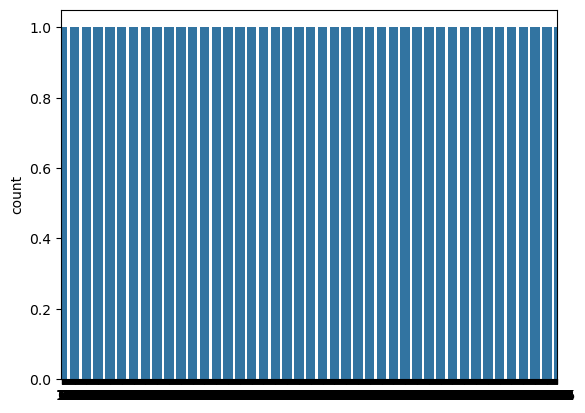

In [15]:
import seaborn as sns
sns.countplot(train['Available Extra Rooms in Hospital'])

<Axes: ylabel='count'>

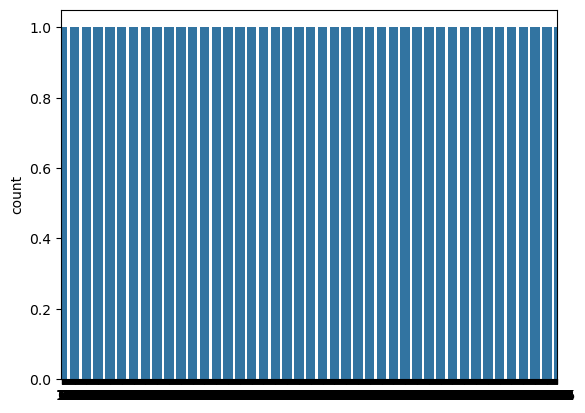

In [16]:
sns.countplot(train['City_Code_Patient'])

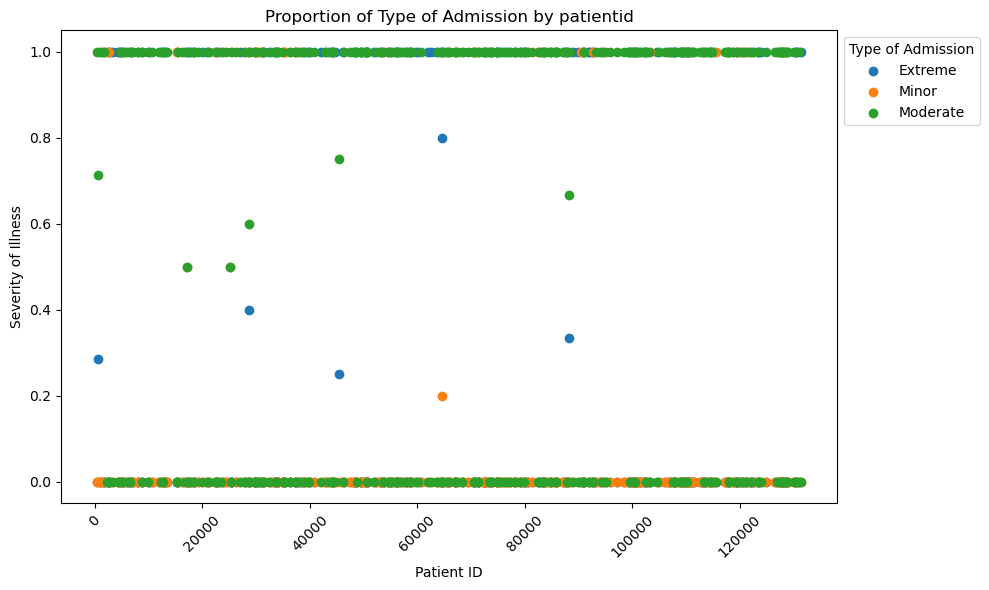

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train is defined and contains the required columns
admission_counts = train.groupby(['patientid', 'Severity of Illness']).size().unstack(fill_value=0)

# Summing up counts for each patient ID to get total count of admissions
total_admissions = admission_counts.sum(axis=1)

# Getting the proportion of each type of admission for each patient
proportion_admissions = admission_counts.div(total_admissions, axis=0)

# Creating scatter plot
plt.figure(figsize=(10, 6))
for admission_type in proportion_admissions.columns:
    plt.scatter(proportion_admissions.index, proportion_admissions[admission_type], label=admission_type)

plt.title('Proportion of Type of Admission by patientid')
plt.xlabel('Patient ID')
plt.ylabel('Severity of Illness')
plt.xticks(rotation=45)
plt.legend(title='Type of Admission', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



### Data Preparation

In [19]:
#Replacing NA values in Bed Grade Column for both Train and Test datssets
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [20]:
#Replacing NA values in  Column for both Train and Test datssets
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [21]:
# Label Encoding Stay column in train dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'].astype('str'))

In [22]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,4


In [23]:
#Imputing dummy Stay column in test datset to concatenate with train dataset
test['Stay'] = -1
df = pd.concat([train, test])
df.shape

(4043, 18)

In [24]:
#Label Encoding all the columns in Train and test datasets
for i in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [25]:
#Spearating Train and Test Datasets
train = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

### Feature Engineering

In [27]:
def get_countid_enocde(train, test, cols, name):
  temp = train.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  train = pd.merge(train, temp, how='left', on= cols)
  test = pd.merge(test,temp2, how='left', on= cols)
  train[name] = train[name].astype('float')
  test[name] = test[name].astype('float')
  train[name].fillna(np.median(temp[name]), inplace = True)
  test[name].fillna(np.median(temp2[name]), inplace = True)
  return train, test

In [28]:
train, test = get_countid_enocde(train, test, ['patientid'], name = 'count_id_patient')
train, test = get_countid_enocde(train, test, 
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
train, test = get_countid_enocde(train, test, 
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

In [29]:
# Droping duplicate columns
test1 = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [30]:
X, y = make_classification(random_state=42)

In [31]:
# Splitting train data for Naive Bayes and XGBoost
X1 = train1.drop('Stay', axis =1)
y1 = train1['Stay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.20, random_state =100)

## Models

### Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB
target = y_train.values
features = X_train.values
classifier_nb = GaussianNB()
model_nb = classifier_nb.fit(features, target)

In [35]:
prediction_nb = model_nb.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score_nb = accuracy_score(prediction_nb,y_test)
print("Acurracy:", acc_score_nb*100)

Acurracy: 32.01970443349754


### GBoost Model

In [37]:

from sklearn.ensemble import GradientBoostingClassifier
classifier_gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.1, n_estimators=800,)

In [38]:
model_gbc = classifier_gbc.fit(X_train, y_train)

In [39]:

prediction_gbc = model_gbc.predict(X_test)
acc_score_gbc = accuracy_score(prediction_gbc,y_test)
print("Accuracy:", acc_score_gbc*100)

Accuracy: 36.206896551724135


# Predictions

In [41]:
# Naive Bayes
pred_nb = classifier_nb.predict(test1.iloc[:,1:])
result_nb = pd.DataFrame(pred_nb, columns=['Stay'])
result_nb['case_id'] = test1['case_id']
result_nb = result_nb[['case_id', 'Stay']]

In [42]:
result_nb['Stay'] = result_nb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nb.head()

,case_id,Stay
0,318439,51-60
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [43]:
# XGBoost
pred_gbc = classifier_gbc.predict(test1.iloc[:,1:])
result_gbc = pd.DataFrame(pred_gbc, columns=['Stay'])
result_gbc['case_id'] = test1['case_id']
result_gbc = result_gbc[['case_id', 'Stay']]

In [44]:
result_gbc['Stay'] = result_gbc['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_gbc.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


## Results

In [46]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   66
11-20                 312
21-30                 941
31-40                 221
41-50                  48
51-60                 257
61-70                  17
71-80                  70
81-90                  15
91-100                 38
More than 100 Days     32
Name: case_id, dtype: int64


In [47]:
# XGBoost
print(result_gbc.groupby('Stay')['case_id'].nunique())

Stay
0-10                   55
11-20                 439
21-30                 775
31-40                 283
41-50                  41
51-60                 320
61-70                   2
71-80                  44
81-90                  17
91-100                  3
More than 100 Days     38
Name: case_id, dtype: int64
